In [11]:
from dotenv import load_dotenv
load_dotenv()

True

In [1]:
import matplotlib.pyplot as plt

In [12]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [13]:
## 2018 - 2020 Returns

timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2018-01-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-12-31", tz="America/New_York").isoformat()

# Set the ticker information
# UPDATE WITH COMPANY TICKERS
tickers = ["AMZN","COST","WMT"]

# Get 3 year's worth of historical price data for Ford, Tesla, GMC
three_year_returns = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
three_year_returns.head()

AMZN                                      \
                              open     high      low    close   volume   
time                                                                     
2018-01-02 00:00:00-05:00  1172.00  1190.00  1170.51  1189.00  1615329   
2018-01-03 00:00:00-05:00  1188.30  1205.49  1188.30  1202.74  1979510   
2018-01-04 00:00:00-05:00  1207.52  1215.87  1204.66  1209.64  1918318   
2018-01-05 00:00:00-05:00  1217.51  1229.14  1210.00  1229.07  2134446   
2018-01-08 00:00:00-05:00  1236.00  1253.08  1232.03  1246.95  2621390   

                             COST                                        WMT  \
                             open     high      low   close   volume    open   
time                                                                           
2018-01-02 00:00:00-05:00  187.19  190.680  186.750  188.36  1746783   99.30   
2018-01-03 00:00:00-05:00  188.52  192.100  188.380  190.61  2258752   98.85   
2018-01-04 00:00:00-05:00  192.00  192.300  187.561  189.12  2566125   99.54   
2018-01-05 00:00:00-05:00  189.43  189.680  186.720  187.75  2000923   99.64   
2018-01-08 00:00:00-05:00  187.32  188.979  187.250  188.47  1126558  100.25   

                                                                
                             high      low    close     volume  
time                                                            
2018-01-02 00:00:00-05:00   99.79   98.520   98.560  8501212.0  
2018-01-03 00:00:00-05:00  100.00   98.770   99.440  7105903.0  
2018-01-04 00:00:00-05:00   99.78   98.911   99.535  5038573.0  
2018-01-05 00:00:00-05:00  100.38   99.610  100.120  5596520.0  
2018-01-08 00:00:00-05:00  101.75  100.210  101.570  6263264.0

In [14]:
# Create and empty DataFrame for closing prices
threeyear_daily_close = pd.DataFrame()

In [15]:
threeyear_daily_close["AMZN"] = three_year_returns["AMZN"]["close"]
threeyear_daily_close["COST"] = three_year_returns["COST"]["close"]
threeyear_daily_close["WMT"] = three_year_returns["WMT"]["close"]

In [16]:
# Drop the time component of the date
threeyear_daily_close.index = threeyear_daily_close.index.date

In [17]:
threeyear_dailyreturns = threeyear_daily_close.pct_change().dropna()

In [18]:
threeyear_dailyreturns.tail(10)

,AMZN,COST,WMT
2020-12-17,-0.001217,0.002301,0.004332
2020-12-18,-0.011104,-0.008966,-0.003149
2020-12-21,0.001459,-0.004524,0.002404
2020-12-22,0.000243,-0.008814,-0.012058
2020-12-23,-0.006172,-0.001077,-0.006657
2020-12-24,-0.004886,0.007935,0.001815
2020-12-28,0.035571,0.017912,0.011986
2020-12-29,0.011191,0.004689,-0.006266
2020-12-30,-0.010498,0.004425,-0.000485
2020-12-31,-0.008960,0.006115,-0.001040


In [23]:
cum_returns = (1 + threeyear_dailyreturns).cumprod() - 1

In [24]:
cum_returns.tail()

,AMZN,COST,WMT
2020-12-24,1.667082,0.935496,0.455966
2020-12-28,1.761951,0.970164,0.473417
2020-12-29,1.792860,0.979401,0.464184
2020-12-30,1.763541,0.988161,0.463474
2020-12-31,1.738780,1.000319,0.461952


Cumulative Returns from 2018

AMZN: 173.878%
COST: 100.032%
WMT: 46.1952%

In [26]:
cum_returns.index.name = 'Date'

In [27]:
cum_returns.index.name

'Date'

In [28]:
cum_returns.tail()

,AMZN,COST,WMT
Date,,,
2020-12-24,1.667082,0.935496,0.455966
2020-12-28,1.761951,0.970164,0.473417
2020-12-29,1.792860,0.979401,0.464184
2020-12-30,1.763541,0.988161,0.463474
2020-12-31,1.738780,1.000319,0.461952


In [32]:
import plotly.express as px
import pandas as pd
from pathlib import Path

In [33]:
amzn_cum_3year = 1.738780
cost_cum_3year = 1.000319
wmt_cum_3year = 0.461952

In [34]:
retail_numbers2018 = {
    "Revenue (in B)": [232.89, 141.58, 499.91],
    "EPS": [20.68, 7.15, 3.29],
    "Std": [0.022885, 0.014039, 0.015176]
}

retail_numbers2019 = {
    "Revenue (in B)": [280.52, 152.7, 514.41],
    "EPS": [23.46, 8.32, 2.28],
    "Std": [0.014359, 0.010100, 0.009320]
}

retail_numbers2020 = {
    "Revenue (in B)": [386.06, 166.76, 523.96],
    "EPS": [42.66, 9.05, 5.22],
    "Std": [0.024488, 0.018572, 0.019947]
}

tickers = ["AMZN", "COST", "WMT"]

In [35]:
retail_2018 = pd.DataFrame(retail_numbers2018, index=tickers)
retail_2018

,Revenue (in B),EPS,Std
AMZN,232.89,20.68,0.022885
COST,141.58,7.15,0.014039
WMT,499.91,3.29,0.015176


In [36]:
retail_2019 = pd.DataFrame(retail_numbers2019, index=tickers)
retail_2019

,Revenue (in B),EPS,Std
AMZN,280.52,23.46,0.014359
COST,152.70,8.32,0.010100
WMT,514.41,2.28,0.009320


In [37]:
retail_2020 = pd.DataFrame(retail_numbers2020, index=tickers)
retail_2020

,Revenue (in B),EPS,Std
AMZN,386.06,42.66,0.024488
COST,166.76,9.05,0.018572
WMT,523.96,5.22,0.019947


In [39]:
retail_threeyear = pd.concat([retail_2018, retail_2019, retail_2020])

In [40]:
retail_threeyear

,Revenue (in B),EPS,Std
AMZN,232.89,20.68,0.022885
COST,141.58,7.15,0.014039
WMT,499.91,3.29,0.015176
AMZN,280.52,23.46,0.014359
COST,152.70,8.32,0.010100
WMT,514.41,2.28,0.009320
AMZN,386.06,42.66,0.024488
COST,166.76,9.05,0.018572
WMT,523.96,5.22,0.019947


In [42]:
retail_threeyear.index.name = 'Ticker'
retail_threeyear

,Revenue (in B),EPS,Std
Ticker,,,
AMZN,232.89,20.68,0.022885
COST,141.58,7.15,0.014039
WMT,499.91,3.29,0.015176
AMZN,280.52,23.46,0.014359
COST,152.70,8.32,0.010100
WMT,514.41,2.28,0.009320
AMZN,386.06,42.66,0.024488
COST,166.76,9.05,0.018572
WMT,523.96,5.22,0.019947


In [56]:
retail_threeyear.reset_index(inplace=True)
retail_threeyear

,index,Ticker,Revenue (in B),EPS,Std
0,0,AMZN,232.89,20.68,0.022885
1,1,COST,141.58,7.15,0.014039
2,2,WMT,499.91,3.29,0.015176
3,3,AMZN,280.52,23.46,0.014359
4,4,COST,152.70,8.32,0.010100
5,5,WMT,514.41,2.28,0.009320
6,6,AMZN,386.06,42.66,0.024488
7,7,COST,166.76,9.05,0.018572
8,8,WMT,523.96,5.22,0.019947


In [57]:
for col in retail_threeyear.columns:
    print(col)

index
Ticker
Revenue (in B)
EPS
Std


In [58]:
retail_threeyear.set_index('Ticker')

,index,Revenue (in B),EPS,Std
Ticker,,,,
AMZN,0,232.89,20.68,0.022885
COST,1,141.58,7.15,0.014039
WMT,2,499.91,3.29,0.015176
AMZN,3,280.52,23.46,0.014359
COST,4,152.70,8.32,0.010100
WMT,5,514.41,2.28,0.009320
AMZN,6,386.06,42.66,0.024488
COST,7,166.76,9.05,0.018572
WMT,8,523.96,5.22,0.019947


In [59]:
retail_threeyear.drop(columns=['index'])

,Ticker,Revenue (in B),EPS,Std
0,AMZN,232.89,20.68,0.022885
1,COST,141.58,7.15,0.014039
2,WMT,499.91,3.29,0.015176
3,AMZN,280.52,23.46,0.014359
4,COST,152.70,8.32,0.010100
5,WMT,514.41,2.28,0.009320
6,AMZN,386.06,42.66,0.024488
7,COST,166.76,9.05,0.018572
8,WMT,523.96,5.22,0.019947


In [64]:
retail_threeyear.columns

Index(['index', 'Ticker', 'Revenue (in B)', 'EPS', 'Std'], dtype='object')

In [67]:
year = ['2018', '2018', '2018', '2019', '2019', '2019', '2020', '2020', '2020']

In [68]:
retail_threeyear['Year'] = year
retail_threeyear

,index,Ticker,Revenue (in B),EPS,Std,Year
0,0,AMZN,232.89,20.68,0.022885,2018
1,1,COST,141.58,7.15,0.014039,2018
2,2,WMT,499.91,3.29,0.015176,2018
3,3,AMZN,280.52,23.46,0.014359,2019
4,4,COST,152.70,8.32,0.010100,2019
5,5,WMT,514.41,2.28,0.009320,2019
6,6,AMZN,386.06,42.66,0.024488,2020
7,7,COST,166.76,9.05,0.018572,2020
8,8,WMT,523.96,5.22,0.019947,2020


In [69]:
retail_threeyear.set_index('Year')

,index,Ticker,Revenue (in B),EPS,Std
Year,,,,,
2018,0,AMZN,232.89,20.68,0.022885
2018,1,COST,141.58,7.15,0.014039
2018,2,WMT,499.91,3.29,0.015176
2019,3,AMZN,280.52,23.46,0.014359
2019,4,COST,152.70,8.32,0.010100
2019,5,WMT,514.41,2.28,0.009320
2020,6,AMZN,386.06,42.66,0.024488
2020,7,COST,166.76,9.05,0.018572
2020,8,WMT,523.96,5.22,0.019947


In [70]:
retail_threeyear.drop(columns=['index'])

,Ticker,Revenue (in B),EPS,Std,Year
0,AMZN,232.89,20.68,0.022885,2018
1,COST,141.58,7.15,0.014039,2018
2,WMT,499.91,3.29,0.015176,2018
3,AMZN,280.52,23.46,0.014359,2019
4,COST,152.70,8.32,0.010100,2019
5,WMT,514.41,2.28,0.009320,2019
6,AMZN,386.06,42.66,0.024488,2020
7,COST,166.76,9.05,0.018572,2020
8,WMT,523.96,5.22,0.019947,2020


In [71]:
retail_threeyear.set_index('Year', inplace=True)

In [74]:
retail_threeyear.drop(columns=['index'], inplace=True)

In [75]:
retail_threeyear

,Ticker,Revenue (in B),EPS,Std
Year,,,,
2018,AMZN,232.89,20.68,0.022885
2018,COST,141.58,7.15,0.014039
2018,WMT,499.91,3.29,0.015176
2019,AMZN,280.52,23.46,0.014359
2019,COST,152.70,8.32,0.010100
2019,WMT,514.41,2.28,0.009320
2020,AMZN,386.06,42.66,0.024488
2020,COST,166.76,9.05,0.018572
2020,WMT,523.96,5.22,0.019947


In [84]:
retail_threeyear.reset_index(inplace=True)
retail_threeyear

,index,Year,Ticker,Revenue (in B),EPS,Std
0,0,2018,AMZN,232.89,20.68,0.022885
1,1,2018,COST,141.58,7.15,0.014039
2,2,2018,WMT,499.91,3.29,0.015176
3,3,2019,AMZN,280.52,23.46,0.014359
4,4,2019,COST,152.70,8.32,0.010100
5,5,2019,WMT,514.41,2.28,0.009320
6,6,2020,AMZN,386.06,42.66,0.024488
7,7,2020,COST,166.76,9.05,0.018572
8,8,2020,WMT,523.96,5.22,0.019947


In [89]:
retail_threeyear

,Year,Ticker,Revenue (in B),EPS,Std
0,2018,AMZN,232.89,20.68,0.022885
1,2018,COST,141.58,7.15,0.014039
2,2018,WMT,499.91,3.29,0.015176
3,2019,AMZN,280.52,23.46,0.014359
4,2019,COST,152.70,8.32,0.010100
5,2019,WMT,514.41,2.28,0.009320
6,2020,AMZN,386.06,42.66,0.024488
7,2020,COST,166.76,9.05,0.018572
8,2020,WMT,523.96,5.22,0.019947


In [91]:
annual_earnings = pd.DataFrame({
    'Ticker': ['AMZN', 'COST', 'WMT'],
    '2018_Rev': [232.89, 141.58, 499.91],
    '2019_Rev': [280.52, 152.70, 514.41],
    '2020_Rev': [386.06, 166.76, 523.96],
    '2018_EPS': [20.68, 7.15, 3.29],
    '2019_EPS': [23.46, 8.32, 2.28],
    '2020_EPS': [42.66, 9.05, 5.22]
})
annual_earnings

,Ticker,2018_Rev,2019_Rev,2020_Rev,2018_EPS,2019_EPS,2020_EPS
0,AMZN,232.89,280.52,386.06,20.68,23.46,42.66
1,COST,141.58,152.70,166.76,7.15,8.32,9.05
2,WMT,499.91,514.41,523.96,3.29,2.28,5.22


In [94]:
list(annual_earnings.columns)

['Ticker',
 '2018_Rev',
 '2019_Rev',
 '2020_Rev',
 '2018_EPS',
 '2019_EPS',
 '2020_EPS']

In [95]:
annual_earnings.head()

,Ticker,2018_Rev,2019_Rev,2020_Rev,2018_EPS,2019_EPS,2020_EPS
0,AMZN,232.89,280.52,386.06,20.68,23.46,42.66
1,COST,141.58,152.70,166.76,7.15,8.32,9.05
2,WMT,499.91,514.41,523.96,3.29,2.28,5.22


In [114]:
amzn_earnings_changes = {
    'Year': [2018, 2019, 2020],
    'AMZN_Revenue': [232.89, 280.52, 386.06],
    'AMZN_EPS': [20.68, 23.46, 42.66]
}

amzn_earnings_df = pd.DataFrame(amzn_earnings_changes)
amzn_earnings_df.set_index('Year', inplace=True)
amzn_earnings_df

,AMZN_Revenue,AMZN_EPS
Year,,
2018,232.89,20.68
2019,280.52,23.46
2020,386.06,42.66


In [113]:
amzn_earnings_df

,Year,AMZN_Revenue,AMZN_EPS
0,2018,232.89,20.68
1,2019,280.52,23.46
2,2020,386.06,42.66


In [110]:
cost_earnings_changes = {
    'Year': [2018, 2019, 2020],
    'COST_Revenue': [141.58, 152.70, 166.76],
    'COST_EPS': [7.15, 8.32, 9.05]
}

cost_earnings_df = pd.DataFrame(cost_earnings_changes)
cost_earnings_df.set_index('Year', inplace=True)
cost_earnings_df

,COST_Revenue,COST_EPS
Year,,
2018,141.58,7.15
2019,152.70,8.32
2020,166.76,9.05


In [111]:
wmt_earnings_changes = {
    'Year': [2018, 2019, 2020],
    'WMT_Revenue': [499.91, 514.41, 523.96],
    'WMT_EPS': [3.29, 2.28, 5.22]
}

wmt_earnings_df = pd.DataFrame(wmt_earnings_changes)
wmt_earnings_df.set_index('Year', inplace=True)
wmt_earnings_df

,WMT_Revenue,WMT_EPS
Year,,
2018,499.91,3.29
2019,514.41,2.28
2020,523.96,5.22


In [118]:
all_earnings_df= pd.concat([amzn_earnings_df, cost_earnings_df, wmt_earnings_df])
all_earnings_df

,AMZN_Revenue,AMZN_EPS,COST_Revenue,COST_EPS,WMT_Revenue,WMT_EPS
Year,,,,,,
2018,232.89,20.68,NaN,NaN,NaN,NaN
2019,280.52,23.46,NaN,NaN,NaN,NaN
2020,386.06,42.66,NaN,NaN,NaN,NaN
2018,NaN,NaN,141.58,7.15,NaN,NaN
2019,NaN,NaN,152.70,8.32,NaN,NaN
2020,NaN,NaN,166.76,9.05,NaN,NaN
2018,NaN,NaN,NaN,NaN,499.91,3.29
2019,NaN,NaN,NaN,NaN,514.41,2.28
2020,NaN,NaN,NaN,NaN,523.96,5.22


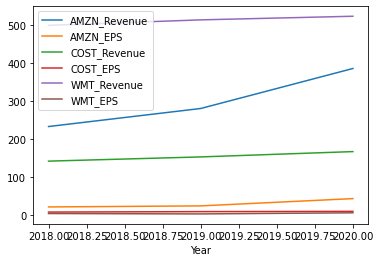

In [129]:
earnings_line = all_earnings_df.plot.line()

In [130]:
all_earnings_df.groupby('Year')

In [131]:
all_earnings_df

,AMZN_Revenue,AMZN_EPS,COST_Revenue,COST_EPS,WMT_Revenue,WMT_EPS
Year,,,,,,
2018,232.89,20.68,NaN,NaN,NaN,NaN
2019,280.52,23.46,NaN,NaN,NaN,NaN
2020,386.06,42.66,NaN,NaN,NaN,NaN
2018,NaN,NaN,141.58,7.15,NaN,NaN
2019,NaN,NaN,152.70,8.32,NaN,NaN
2020,NaN,NaN,166.76,9.05,NaN,NaN
2018,NaN,NaN,NaN,NaN,499.91,3.29
2019,NaN,NaN,NaN,NaN,514.41,2.28
2020,NaN,NaN,NaN,NaN,523.96,5.22


In [132]:
amzn_earnings_df

,AMZN_Revenue,AMZN_EPS
Year,,
2018,232.89,20.68
2019,280.52,23.46
2020,386.06,42.66


In [133]:
cost_rev = [141.58, 152.70, 166.76]
cost_eps = [7.15, 8.32, 9.05]
wmt_rev = [499.91, 514.41, 5.22]
wmt_eps = [3.29, 2.28, 5.22]

In [134]:
amzn_earnings_df['COST_Revenue'] = cost_rev
amzn_earnings_df['COST_EPS'] = cost_eps

In [135]:
amzn_earnings_df['WMT_Revenue'] = wmt_rev
amzn_earnings_df['WMT_EPS'] = wmt_eps
amzn_earnings_df

,AMZN_Revenue,AMZN_EPS,COST_Revenue,COST_EPS,WMT_Revenue,WMT_EPS
Year,,,,,,
2018,232.89,20.68,141.58,7.15,499.91,3.29
2019,280.52,23.46,152.70,8.32,514.41,2.28
2020,386.06,42.66,166.76,9.05,5.22,5.22


In [148]:
amzn_earnings_df.reset_index(inplace=True)

In [149]:
amzn_earnings_df.columns

Index(['Year', 'AMZN_Revenue', 'AMZN_EPS', 'COST_Revenue', 'COST_EPS',
       'WMT_Revenue', 'WMT_EPS'],
      dtype='object')

In [150]:
amzn_earnings_df.set_index('Year')

,AMZN_Revenue,AMZN_EPS,COST_Revenue,COST_EPS,WMT_Revenue,WMT_EPS
Year,,,,,,
2018,232.89,20.68,141.58,7.15,499.91,3.29
2019,280.52,23.46,152.70,8.32,514.41,2.28
2020,386.06,42.66,166.76,9.05,5.22,5.22


In [159]:
amzn_earnings_df.columns

Index(['Year', 'AMZN_Revenue', 'AMZN_EPS', 'COST_Revenue', 'COST_EPS',
       'WMT_Revenue', 'WMT_EPS'],
      dtype='object')

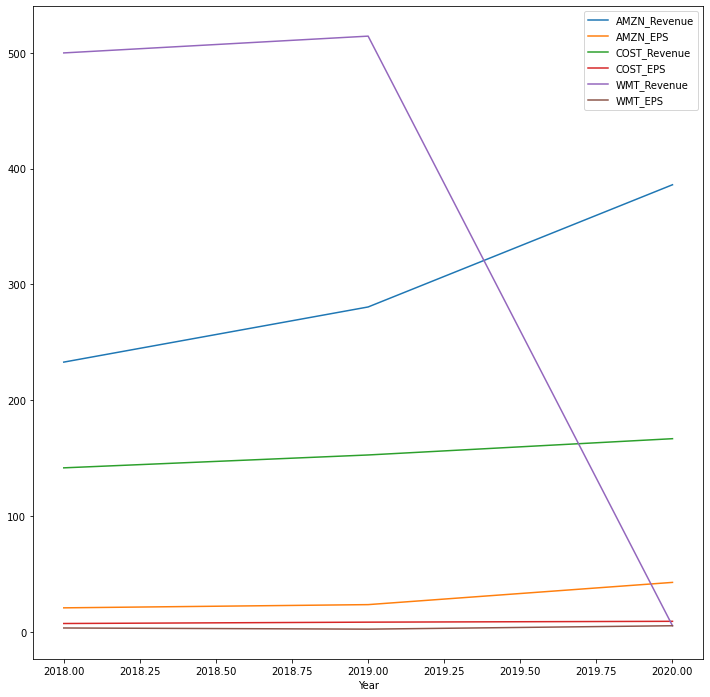

In [164]:
lines = amzn_earnings_df.plot.line(x='Year', figsize=(12,12))

In [165]:
amzn_earnings_df

,Year,AMZN_Revenue,AMZN_EPS,COST_Revenue,COST_EPS,WMT_Revenue,WMT_EPS
0,2018,232.89,20.68,141.58,7.15,499.91,3.29
1,2019,280.52,23.46,152.70,8.32,514.41,2.28
2,2020,386.06,42.66,166.76,9.05,5.22,5.22


In [166]:
amzn_earnings_df.set_index('Year', inplace=True)

In [167]:
amzn_earnings_df

,AMZN_Revenue,AMZN_EPS,COST_Revenue,COST_EPS,WMT_Revenue,WMT_EPS
Year,,,,,,
2018,232.89,20.68,141.58,7.15,499.91,3.29
2019,280.52,23.46,152.70,8.32,514.41,2.28
2020,386.06,42.66,166.76,9.05,5.22,5.22


In [168]:
from pylab import MaxNLocator

In [171]:
x_axis = lines.get_xaxis()
x_axis.set_major_locator(MaxNLocator(integer=True))

In [174]:
amzn_earnings_df

,AMZN_Revenue,AMZN_EPS,COST_Revenue,COST_EPS,WMT_Revenue,WMT_EPS
Year,,,,,,
2018,232.89,20.68,141.58,7.15,499.91,3.29
2019,280.52,23.46,152.70,8.32,514.41,2.28
2020,386.06,42.66,166.76,9.05,5.22,5.22


In [175]:
lines

<AxesSubplot:xlabel='Year'>

<AxesSubplot:xlabel='Year'>

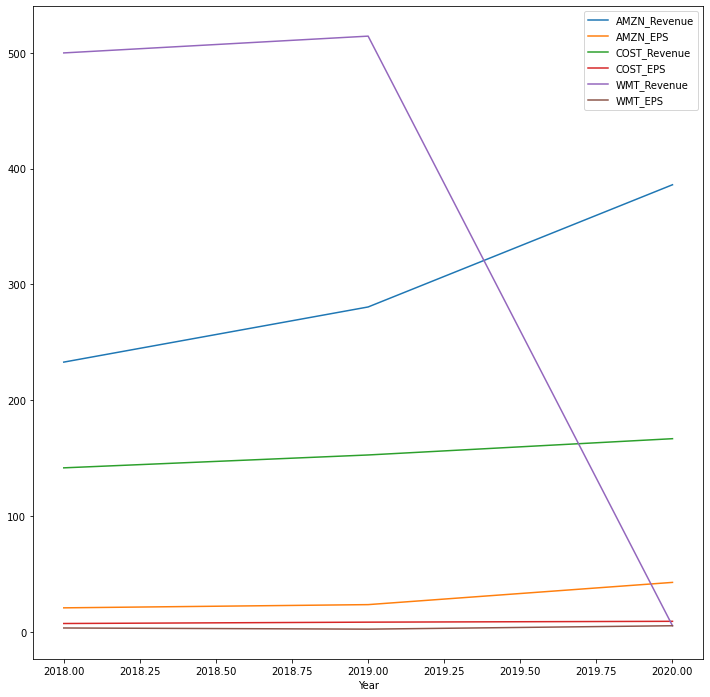

In [177]:
amzn_earnings_df.plot.line(figsize=(12,12))